<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2024/blob/main/session2/session2.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

# Deep Learning using PyTorch

In last week's session, you learnt the basics of Python and looked at some popular libraries for working with data. In this session, you will learn to work with PyTorch, one of the most popular Python frameworks for Deep Learning.

PyTorch is a Python-based Deep Learning platform that provides flexibility and speed for developing Deep Learning solutions. At its core, PyTorch provides the following key features:

* A multidimensional **Tensor** object, similar to NumPy Array but with GPU acceleration.
* An automatic differentiation engine called **Autograd** for efficiently and automatically computing derivatives needed for optimization.
* A clean, modular API for building and deploying deep learning models.

In this notebook, we'll first look at Tensors - what they are, how to create them, manipulate them and perform operations on them. In actual Deep Learning projects, we might be dealing with huge datasets. So we'll take a look at how we can manage them easily using PyTorch's features. We then go through the whole flow of building neural networks, training them, testing (as well as monitoring) their performance. We will look at all the components that go into a deep learning solution using the task of identifying hand written digits from the MNIST dataset as an example.


We have a few exercises after each section that will help you apply the concepts discussed in the notebook as well as allow you to experiment with them. We also have some challenges for you at the end of the notebook, try them all out!

**Copy the notebook to your drive to start working on it**

A few shortcuts that might come in handy:

*   Run a cell: Ctrl + Enter
*   Run a cell and move to the next one: Shift + Enter
*   Navigate between cells: Arrow keys

# PyTorch Basics



Let's first import some useful libraries - PyTorch (torch) and Numpy

In [1]:
import torch
import numpy as np

## Tensors

A PyTorch Tensor is a specialized data structure that is very similar to arrays and matrices. It is a multi-dimensional array with a uniform type (called a dtype), and can make use of GPUs or other hardware accelerators. Apart from the data a PyTorch tensor is supposed to store, when required, it stores additional information about its derivatives with respect to some other variables which might be necessary during the optimization step. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

###Creating Tensors

There are various ways of creating tensors, and when working on any real deep learning project, we will usually use more than one.



In [2]:
# From Python iterables such as lists and tuples

# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples (nested iterables can also be handled as long as
# the dimensions are compatible)
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])   # numpy array
c = torch.tensor(c)

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")

a: tensor([0, 1, 2])
b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [3]:
# Tensor constructors

x = torch.ones(5, 3)        # creates a tensor with given dimensions and initilaizes all elements to 1
y = torch.zeros(2)          # creates a tensor with given dimensions and initializes all elements to 0
z = torch.empty(1, 1, 5)    # creates a tensor with given dimensions, without any initialization. This is faster than ones and zeros. (Elements have garbage values)

print(f"x: {x}")
print(f"y: {y}")
print(f"z: {z}")

a = torch.ones_like(y)      # creates a tensor of the same shape as the input to the function, and initializes all elements to 1
b = torch.zeros_like(torch.tensor([4, 5, 6, 7]))     # creates a tensor of the same shape as the input to the function, and initializes all elements to 0

print(f"\na: {a}")
print(f"b: {b}")

x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
y: tensor([0., 0.])
z: tensor([[[0., 0., 0., 0., 0.]]])

a: tensor([1., 1.])
b: tensor([0, 0, 0, 0])


In [4]:
# Random tensors

# Uniform distribution
a = torch.rand(1, 3)

# Normal distribution
b = torch.randn(3, 4)

print(f"a: {a}")
print(f"b: {b}")

a: tensor([[0.9833, 0.2373, 0.8128]])
b: tensor([[-0.1013,  0.3722, -0.0977,  0.2938],
        [ 1.2748,  2.3107, -0.7396, -0.9473],
        [-0.0109, -0.1266, -0.4224, -0.0967]])


In [5]:
# Number ranges

a = torch.arange(0, 10, step=2)           # creates a tensor with elements from 0 (included) to 10 (excluded), with step size 2
b = torch.linspace(0, 5, steps=11)        # creates a tensor with 11 equally spaced elements from 0 to 5 (both included)

print(f"a: {a}\n")
print(f"b: {b}\n")

a: tensor([0, 2, 4, 6, 8])

b: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



### Tensor Operations

In [6]:
# Pointwise tensor arithmetic using regular python operators

x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])

x + y, x - y, x * y, x / y, x**y  # The `**` is the exponentiation operator

(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

In [7]:
# Pointwise tensor arithmetic using inbuilt functions

# Adding tensors of the same shape
z = torch.add(x, y)
print(f"Sum of x and y: {z}\n")

# Pointwise multiplication of tensors
torch.multiply(x, y, out=z)   # using the optional 'out' parameter to store the result (works only when z already exists)

print(f"Pointwise multiplication of x and y: {z}")

Sum of x and y: tensor([ 2,  4,  7, 12])

Pointwise multiplication of x and y: tensor([ 1,  4, 12, 32])


In [8]:
# Operations on elements within a tensor

x = torch.rand(3, 3)
print(x)

# sum() - note the axis is the axis you move across when summing
print(f"\nSum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")

print(f"\nMean value of all elements of x {x.mean()}")
print(f"Mean values of the columns of x {x.mean(axis=0)}")
print(f"Mean values of the rows of x {x.mean(axis=1)}")

tensor([[0.4410, 0.4682, 0.7149],
        [0.2056, 0.1425, 0.5082],
        [0.4414, 0.2333, 0.8837]])

Sum of every element of x: 4.038796901702881
Sum of the columns of x: tensor([1.0880, 0.8441, 2.1068])
Sum of the rows of x: tensor([1.6241, 0.8563, 1.5584])

Mean value of all elements of x 0.4487552046775818
Mean values of the columns of x tensor([0.3627, 0.2814, 0.7023])
Mean values of the rows of x tensor([0.5414, 0.2854, 0.5195])


In [9]:
# Performing matrix multiplication on Tensors

x = torch.tensor([            # 3x2 matrix
    [1, 2],
    [3, 4],
    [5, 6]
])

y = torch.tensor([            # 2x3 matrix
    [1, 2, 3],
    [4, 5, 6]
])

z1 = torch.matmul(x, y)       # (3x2)*(2x3)-->(3x3)
z2 = torch.matmul(y, x)       # (2x3)*(3x2)-->(2x2)

# torch.matmul is different from torch.mul - try what torch.mul does on a pair
# of(1x3) and (3x1) tensors

print(f"z1: {z1}")
print(f"z2: {z2}")

z1: tensor([[ 9, 12, 15],
        [19, 26, 33],
        [29, 40, 51]])
z2: tensor([[22, 28],
        [49, 64]])


### Manipulating Tensors

#### Indexing elements from the tensor

In [10]:
x = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Index the third element of the second row using the [_, _] format
print(x[1, 2])

# Indexing a single element returns a 1D tensor. 1DTensor.item() to get the item stored in the tensor
print(type(x[1, 2]))
print(type(x[1, 2].item()))
print("\n")

# Index the first row
print(x[0])

# Index a range of elements
print(x[1:3, 0:2])

# Changing the contents of a portion of the tensor

print(f"x = {x}")
x[0, 0] = -1
x[1:, 2] = 0
x[1:, 0:2] = torch.ones(2, 2)
print(f"\nAfter assignment, x:\n{x}")

tensor(6)
<class 'torch.Tensor'>
<class 'int'>


tensor([1, 2, 3])
tensor([[4, 5],
        [7, 8]])
x = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

After assignment, x:
tensor([[-1,  2,  3],
        [ 1,  1,  0],
        [ 1,  1,  0]])


#### Changing the shape of a tensor

In [11]:
x = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
print(f"x = {x}")

# flatten - lets you treat a multidimensional tensor as a single dimension one
y = x.flatten()
print(f"y = {y}")

# reshape - lets you treat a tensor as one with the given shape (x.view() does
# the same thing, but works only for contiguous tensors)
z = x.reshape(4, 3)
print(f"z = {z}\n")

# Important - flatten and reshape only give you a view of the original array
# That means that they all share the same memory and any changes made to one
# of reflect in the all of them

x[0, 0] = 0
print("After changing x:")
print(f"y = {y}")
print(f"z = {z}")

y[6:] = 0
print("\nAfter changing y:")
print(f"x = {x}")

x = tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
y = tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
z = tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

After changing x:
y = tensor([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
z = tensor([[ 0,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

After changing y:
x = tensor([[0, 2, 3, 4],
        [5, 6, 0, 0],
        [0, 0, 0, 0]])


#### Making copies of the tensor

In [12]:
x = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

y = torch.clone(x)

x[:, 0] = 0
y[0, :] = 0
print("After making the changes to x and y:")
print(f"x = {x}")
print(f"y = {y}")

# Flatten and reshape can be used on a clone of the original tensor to keep each
# of them unaffected by changes to the other

After making the changes to x and y:
x = tensor([[ 0,  2,  3,  4],
        [ 0,  6,  7,  8],
        [ 0, 10, 11, 12]])
y = tensor([[ 0,  0,  0,  0],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


#### Adding elements to the tensor

In [13]:
# The append function does not exist in tensors as they have a fixed size, so we
# make use of the concat function to get a new tensor with additional elements

x = torch.tensor([
    [1, 2],
    [3, 4]
])

y = torch.tensor([
    [5, 6],
    [6, 7]
])

z = torch.tensor([
    [5, 6, 7],
    [8, 9, 0]
])

# torch.cat(tensors, dim=0) takes in a tuple of tensors to concatenate, and an
# optional dim parameter to specify the dimension along which to concatenate
print(torch.cat((x, y), dim=0))
print(torch.cat((x, z), dim=1))     # try with dim=-1 and guess what that means

# Note: cat(), concat() and concatenate() are all aliases of each other, they
# work in the exact same manner

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [6, 7]])
tensor([[1, 2, 5, 6, 7],
        [3, 4, 8, 9, 0]])


### Exercises

Practice the things learnt above using the following exercises:

In [14]:
x = torch.zeros(3, 3)
print(x)

# 1. Populate x with values ranging from 0 to 8.

# 2. Print out the element at the second row and third column.

# 3. Change the value of the element at the first row and second column to 10.

# 4. Flatten the tensor and print the result.

# 5. Concatenate the tensor with another 1x3 tensor with values ranging from 9 to 11.

# 6. Reshape the tensor to a 2x6 tensor and print the result.

# 7. First make a copy of the tensor, and then in the copy, have the elements appear in the reverse order.


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


## GPU vs CPU Execution



Colab gives you the option of running the notebook on a CPU or a GPU (with a limited session time). Here is how you can check whether you have a GPU available with you or not:

In [15]:
import torch
import numpy as np

print(torch.cuda.is_available())

True



Go to the Runtime tab → Change runtime type and try switching between the T4 GPU and CPU options from the Hardware Accelerator list and rerun the above cell. Switch back to GPU and rerun the cell before moving on.

*Once you change the runtime you will need to import necessary libraries again, that is the reason for the import statements repeating in the above cell.*

Let's store the information about availability of GPU inside a variable called DEVICE which we shall use later. If we want to make use of the GPU resource, when it is available, we will need to move the tensors and the model onto the GPU. We do this using the following methods:

In [16]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# we can specify a device when we first create our tensor
x = torch.randn(2, 2, device=DEVICE)
print("dtype of x:", x.dtype)
print("device on which x is stored:", x.device)

# we can also use the .to() method to change the device a tensor lives on
y = torch.randn(2, 2)
print(f"y before calling to() | device: {y.device} | dtype: {y.type()}")

y = y.to(DEVICE)
print(f"y after calling to() | device: {y.device} | dtype: {y.type()}")

dtype of x: torch.float32
device on which x is stored: cuda:0
y before calling to() | device: cpu | dtype: torch.FloatTensor
y after calling to() | device: cuda:0 | dtype: torch.cuda.FloatTensor


#Datasets and Data Loader

Deep Learning projects usually involve large datasets. It is important to follow some good data handling practices to operate on the data in an effecient manner. PyTorch presents us with a couple of libraries to help us with things like fetching datasets from its library, managing the train, validate and test splits, loading data in batches to present to the model for training/testing etc.

In the following sections, we look at:
1. How to load/download standard Datasets into your program using torchvision's dataset module
2. How to access the loaded data in small batches that you can feed to your model for training

We shall use the example of the MNIST dataset, which consists of a large number of b/w images (28x28 pixels) of handwritten digits (0-9). We'll use it to learn how to design and train a neural network to solve an image classification problem.
<!-- * TorchVision datasets have a parameter - *transform* to modify the features -->

<!---
and *target_transform* to modify the labels
-->


### Dataset

In [17]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data",                  # gets the data from the local folder specified by root, if available
    train=True,                   # specifies the split to fetch (train if True/test if False)
    download=True,                # downloads the data from the internet if dataset is not present in root
    transform=ToTensor()          # can be used to transform the features if necessary (not really relevant for MNIST)
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 444921731.97it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 56211458.85it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 154420832.33it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21821911.53it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [18]:
print ("Number of samples in training data ", len(training_data))
print ("Number of samples in test data ", len(test_data))

Number of samples in training data  60000
Number of samples in test data  10000


Let's look at some of the images that we've loaded

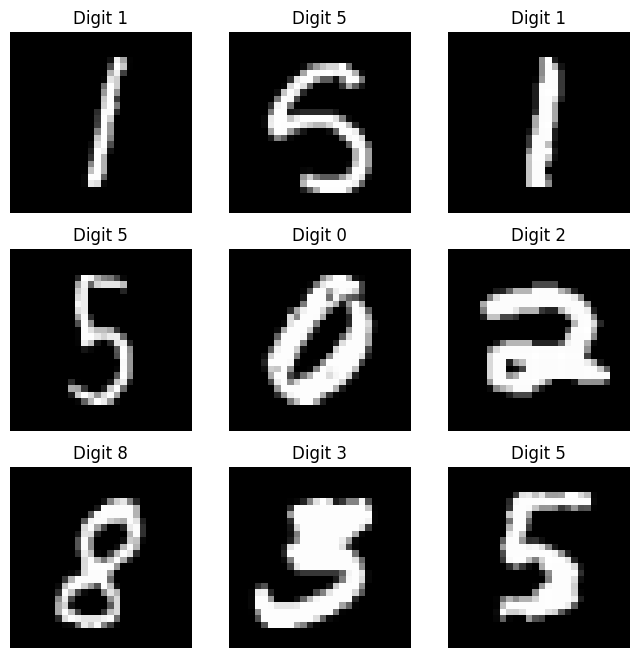

In [19]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"Digit {label}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

###Dataloaders

The Dataloader class wraps an iterable around the dataset to enable easy access to the data. Using the dataloader, you can specify the batch size you want to set and interate through it batchwise as follows:

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


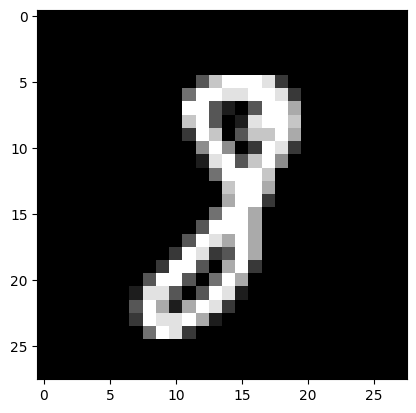

Label: 8


In [21]:
# Iterate through the DataLoader
train_features, train_labels = next(iter(train_dataloader))   # can use this in a loop to feed this data to your model
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# First sample of the batch
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Building Neural Networks

Now that we know how to get data from the dataset and get ready to feed it in batches to the model for training, let's look at how we build the model itself!

We'll look at the most basic kind of neural networks in this notebook called the Multi Layer Perceptron (MLP). An MLP, as its name suggests is made up of layers. The first layer takes the training data as input and processes it. Each subsequent layer takes in the output of the previous one, processes it and sends it to the next one. The output of the last layer is considered as the output of the model.

Let's first look at how to create the individual layers and then at how to combine all of them into a container that we can use to build our model.

Let's create a batch of (input, output) pairs that we can pass through our network and compare the result with.

In [22]:
batch_size = 4
input_dim = 6
output_dim = 1
input_tensor = torch.rand(batch_size, input_dim)      # 2 samples of dimension 6
target_tensor = torch.rand(batch_size, output_dim)    # 2 samples of dimension 1

print(input_tensor)
print(target_tensor)

tensor([[0.3221, 0.3278, 0.3299, 0.6387, 0.3795, 0.8722],
        [0.4556, 0.8951, 0.2413, 0.3057, 0.6252, 0.0307],
        [0.5234, 0.8741, 0.5400, 0.9685, 0.7416, 0.9292],
        [0.2696, 0.0284, 0.7086, 0.4757, 0.9425, 0.7322]])
tensor([[0.1418],
        [0.1633],
        [0.6520],
        [0.3452]])


We can build individual layers of the neural network using PyTorch's nn module.

### Linear Layer

The most basic type of neural network layer is a linear or fully connected layer. This is a layer where every input influences every output of the layer to a degree specified by the layer’s weights. If the layer has m inputs and n outputs, the weights will be an m x n matrix.

Let's use a linear layer with 6 inputs and 3 outputs as the first layer of the network, send an input through it and observe the output.

In [23]:
import torch.nn as nn

layer1 = torch.nn.Linear(in_features=input_dim, out_features=3, bias=True)        # parameters of the layer are initialized to random values
print(layer1)

output_tensor = layer1(input_tensor)
print(output_tensor)

Linear(in_features=6, out_features=3, bias=True)
tensor([[-0.0168, -0.1336, -0.2541],
        [ 0.2453, -0.1089, -0.5208],
        [-0.0752, -0.2744, -0.4347],
        [ 0.3571, -0.0186, -0.1849]], grad_fn=<AddmmBackward0>)


### Activation Function

*An activation function is a function used on the neuron and it governs how much a neuron gets activated (how big its output should be) depending on its inputs.*

Given below is a list of commonly used activation functions and their graphs. Check this [link](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) out for more about activation functions.

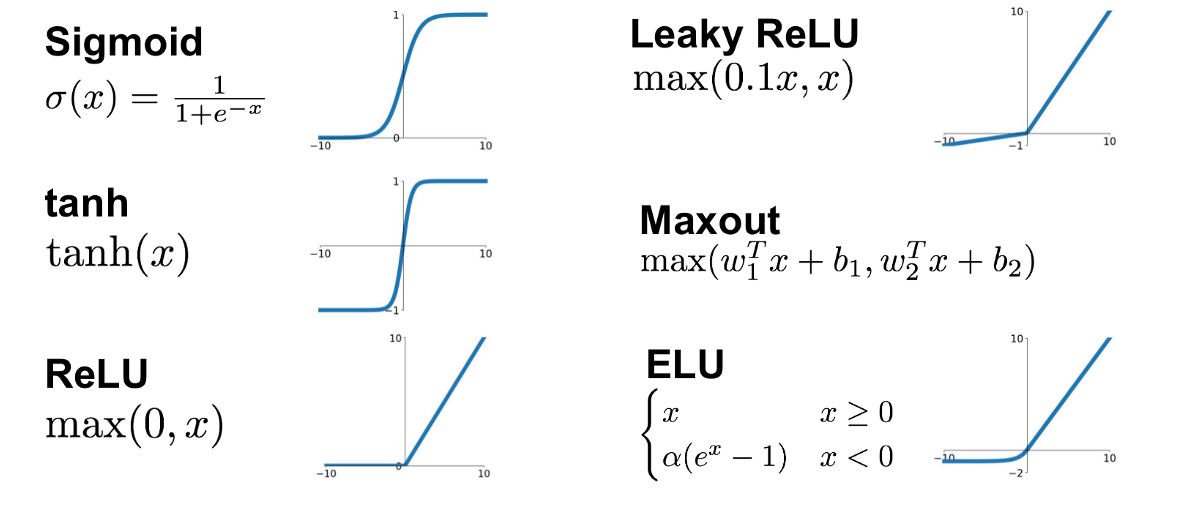

Let's propagate the output we received from the layer we defined earlier through a Rectified Linear Unit (ReLU) activation function.

Try out other activation functions and observe their behaviour!

In [24]:
act_function = torch.nn.ReLU()
print(act_function)

output_tensor = act_function(output_tensor) # output_tensor is overwritten
print(output_tensor)

ReLU()
tensor([[0.0000, 0.0000, 0.0000],
        [0.2453, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.3571, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)


### Second Linear Layer
Now let's create another layer and pass the output of the previous layer through it.

In [25]:
layer2 = torch.nn.Linear(in_features=3, out_features=output_dim, bias=True)
print(layer2)

output_tensor = layer2(output_tensor)
print(output_tensor)

Linear(in_features=3, out_features=1, bias=True)
tensor([[-0.3106],
        [-0.2880],
        [-0.3106],
        [-0.2776]], grad_fn=<AddmmBackward0>)


### nn.Sequential

All the layers defined above can be chained together into a single container using the nn.Sequential module. We can pass the input through the series of layers by simply passing it through a nn.Sequential module.

In [26]:
layer_chain = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, output_dim)
)

print(layer_chain)
output_tensor = layer_chain(input_tensor)
print(output_tensor)                      # compare the output with the one printed earlier, why do you think they are different?

Sequential(
  (0): Linear(in_features=6, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)
tensor([[ 0.0258],
        [-0.0648],
        [-0.0113],
        [-0.0323]], grad_fn=<AddmmBackward0>)


### Exercise

Try to construct a stack of layers on your own according to the specification given below. Given an input tensor, run it through your network and print out the output.

In [27]:
x = torch.rand(1, 10)

sequential_stack = nn.Sequential(       # create your stack of layers here using the nn.Sequential module
                                        # it needs to have 4 layers, with the input dimension decreasing evenly from 10 to 2
#""" Write you code here """            # after each layer, add an activation function of your choice

)

print(sequential_stack(x))


tensor([[0.5545, 0.2465, 0.3677, 0.6493, 0.2304, 0.4671, 0.9216, 0.7323, 0.8967,
         0.2460]])


## The NeuralNetwork Class

Let's now go from individual layers to a full fledged model using the PyTorch NeuralNetwork class. It has an **\_\_init\_\_()** where we define the layers and other components of a model, and a **forward()** method where the computation gets done.
<!-- **Architecture of our neural network**

`def forward():
  ...
`
is implicitly defined in the nn.Sequence for for forward propagation. However, if we want to have more flexibility or when the architecture is nor purely sequential we need to write our own custom `forward` -->

In [28]:
from torch import nn

class NeuralNetwork(nn.Module): # Inherit from nn.Module
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()  # converts the input into 1D if it is a higher dimensional one

        # Sequential container explained previously
        self.layer_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layer_stack(x)
        return logits

    def predict(self, x):

      # Pass the data through the networks
      logits = self.forward(x)
      pred_probab = nn.Softmax(dim=1)(logits)      # dim: the dimension along which softmax is to be applied

      # Choose the label with the highest score
      output = pred_probab.argmax(1)
      return output

In [29]:
model = NeuralNetwork().to(DEVICE)              # initializing the model and moving it to the GPU, if one exists
print(f"Model structure: {model}\n")

# # Uncomment this section to inspect the parameters of the model:
# for name, param in model.named_parameters():
#     print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)



Let's see if our network works:

Image batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])

Sample Image : 


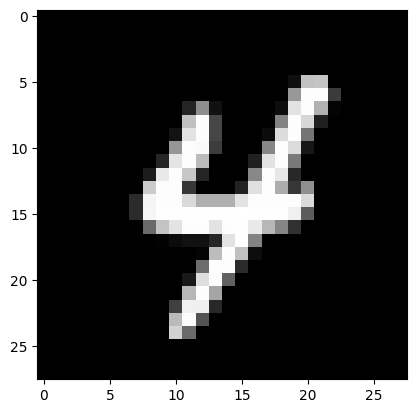

Sample image is on  cpu  device 
Moved it to  cuda:0
Predicted class: 7
Ground Truth / True class: 4
Predicted class using model.predict() :  tensor([7], device='cuda:0')


In [30]:
def test_a_sample(model):   # input a model which is already on device
  sample_test_img_batch, sample_test_label_batch = next(iter(test_dataloader))
  print(f"Image batch shape: {sample_test_img_batch.size()}")
  print(f"Labels batch shape: {sample_test_label_batch.size()}")

  # Let's check model for one image (there a 10% chance you get the correct prediction by chance, try again if that happens :P)
  img, y_gt= sample_test_img_batch[0],  sample_test_label_batch[0]
  print("\nSample Image : ")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.show()
  print("Sample image is on ", img.device , " device ")
  img = img.to(DEVICE)
  print("Moved it to ", img.device)     # now, both the model and the input are on the same device

  pred_probab = nn.Softmax(dim=1)(model(img))
  y_pred = pred_probab.argmax(1)
  print(f"Predicted class: {y_pred.item()}")
  print(f"Ground Truth / True class: {y_gt}")

  print("Predicted class using model.predict() : ", model.predict(img))

# call the function
test_a_sample(model)

Why does it predict incorrectly? Because we did not train our network yet!

In order to train our network on the training data, we need to give it a loss function that it can aim to minimize, and an optimization algorithm that it can use to carry out that minimization.

# Loss Function

A loss function measures the degree of dissimilarity between the output obtained from our model and the target value. It is this loss function that we want to minimize during by training the model on the training data.

PyTorch provides predefined modules for common loss functions like nn.MSELoss (Mean Square Error) for regression tasks, and nn.CrossEntropyLoss for classification tasks.

In [31]:
output_tensor = torch.tensor([0.0, 1, 2, 3, 4, 5])    # assume that this is the output of a model for a given input
target_tensor = torch.tensor([0.0, 0.5, 1, 1.5, 2, 2.5])    # and this is its actual label
print('model output:', output_tensor)
print('target:', target_tensor)

mse_loss = nn.MSELoss()

print('\nMSE Loss:', mse_loss(output_tensor , target_tensor))

model output: tensor([0., 1., 2., 3., 4., 5.])
target: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])

MSE Loss: tensor(2.2917)


**Remember to use the cross entropy loss later for our MNIST classification task!**

Have a look at this link for more about the [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

### Exercise

Go through the [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) mentioned in the PyTorch docs and construct one of your choice. Observe how it compares to the MSE loss.

In [32]:
your_loss_fn = nn.MSELoss() # replace this your favourite loss function (Try L1 loss and Huber loss)
your_loss = your_loss_fn(output_tensor, target_tensor)
print(your_loss)

tensor(2.2917)


# Optimizers

When presented with some input data, our untrained network, whose parameters have been initialized randomly, cannot be expected to give the correct answer. Optimization is the process of adjusting the model parameters in a series of steps to reduce the error in prediction. Optimization algorithms define how this process is carried out.

We use the Stochastic Gradient Descent (SGD) optimization algorithm for our example. Check out the official [PyTorch docs](https://pytorch.org/docs/stable/optim.html#algorithms) for more examples of optimization algorithms.

In [33]:
import torch.optim as optim

sgd_opti = optim.SGD(model.parameters(), lr=0.01)

In the context of standard gradient descent optimization, the parameters are updated using the following equation:


$$\theta_{t+1} = \theta_t - \eta \cdot \nabla L(\theta_t)$$


Here, $\theta_{t}$ represents the parameters at iteration $t$, $\eta$ is the learning rate, and $\nabla L(\theta_t)$ is the gradient of the loss function L with respect to the parameters $\theta_t$​ . This equation guides the update of parameters in the direction opposite to the gradient, with the step size controlled by the learning rate.

### Optimization Step

A single step of optimization consists of the following parts:

1. Forward pass
2. Loss calculation
3. Backward pass
4. Weight update

Check this [3Blue1Brown video](https://www.youtube.com/watch?v=tIeHLnjs5U8) out later, for a deep dive into the optimization process.

In [34]:
input_tensor = torch.rand(1, 28, 28).to(DEVICE)  # dummy sample image
target_tensor = torch.tensor([[0.0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]).to(DEVICE)  # dummy target indicating that the fifth element is the correct label

# Print network weights before weights update:
print('Model Weight Before Weight Update:')
# Assuming 'model' is your PyTorch model
model_state_dict = model.state_dict()

# Print the weights of the first layer
for layer, weights in model_state_dict.items():
    print(f"{layer}: {weights}")
    break

Model Weight Before Weight Update:
layer_stack.0.weight: tensor([[ 0.0266, -0.0193, -0.0218,  ..., -0.0200,  0.0020, -0.0069],
        [-0.0312, -0.0256,  0.0325,  ..., -0.0320, -0.0003, -0.0067],
        [ 0.0097, -0.0065, -0.0320,  ..., -0.0287,  0.0128, -0.0038],
        ...,
        [ 0.0006, -0.0019,  0.0267,  ...,  0.0017, -0.0168,  0.0332],
        [ 0.0098, -0.0178,  0.0083,  ..., -0.0072, -0.0261,  0.0044],
        [ 0.0292,  0.0253,  0.0215,  ..., -0.0291, -0.0195, -0.0313]],
       device='cuda:0')


Let's perform one step of optimization. Rerun the cell a couple of times and observe the changes in the values of the weights compared to those before the optimization step.

In [35]:
## 1. Forward Propagation
output_tensor = model(input_tensor)

# 2. Compute loss
loss = mse_loss(output_tensor, target_tensor)

# 3. Backward pass
sgd_opti.zero_grad()
loss.backward()

# 4. Weight Update
sgd_opti.step()

# Print network weights before weights update:
print('Model Weight After Weight Update:')
# Assuming 'model' is your PyTorch model
model_state_dict = model.state_dict()

# Print the weights of the first layer
for layer, weights in model_state_dict.items():
    print(f"{layer}: {weights}")
    break

Model Weight After Weight Update:
layer_stack.0.weight: tensor([[ 0.0266, -0.0193, -0.0218,  ..., -0.0200,  0.0020, -0.0069],
        [-0.0312, -0.0256,  0.0325,  ..., -0.0320, -0.0003, -0.0067],
        [ 0.0097, -0.0065, -0.0320,  ..., -0.0287,  0.0128, -0.0038],
        ...,
        [ 0.0006, -0.0019,  0.0267,  ...,  0.0017, -0.0168,  0.0332],
        [ 0.0098, -0.0178,  0.0083,  ..., -0.0072, -0.0261,  0.0044],
        [ 0.0292,  0.0253,  0.0215,  ..., -0.0291, -0.0195, -0.0313]],
       device='cuda:0')


### Exercise
Go through the [PyTorch docs](https://pytorch.org/docs/stable/optim.html#algorithms) to see what other optimization algorithms apart from SGD are used commonly.
<!-- Try [this](https://emiliendupont.github.io/2018/01/24/optimization-visualization/) interactive demonstration to get a feel for what the optimization process looks like with different optimizers. -->

### Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Unlike the parameters of the model which are learnt by the model using training examples, these are going to be set by you. Examples of hyperparameters include:

* Number of epochs - the number of times to iterate over the dataset during the training process

* Batch size - the number of data samples propagated through the network before the parameters are updated

* Learning Rate - how much to update models parameters after processing each batch of data

Check this [tool](https://losslandscape.com/explorer) out using which you can get an idea of how gradient descent happens on different loss landscape and how the value of learning rate affects the optimization process.

In [36]:
# Setting the values of hyperparameters

learning_rate = 1e-3
batch_size = 64
epochs = 5

# Optimization Loop

Once we decide on a set of hyperparameters, we can go ahead with training our model in an optimization loop. Each iteration of the optimization loop, called an epoch, has two main parts:

 *  Train Loop - iterate over the training dataset and try to converge to optimal parameters.

 * Validation/Test Loop - iterate over the test dataset to check if the model performance is improving.

In [37]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

##  Train Loop

In [38]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X=X.to(DEVICE)
        y=y.to(DEVICE)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()


        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)

            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return loss



## Test Loop

In [39]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(DEVICE)
            y=y.to(DEVICE)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Accuracy: {(100*correct):>0.1f}%, Test loss (avg): {test_loss:>8f} \n")

    return test_loss , 100*correct

Putting them together:

In [40]:
# Run this section 2-3 times and observe what is happening to the train/test loss and test accuracy
# Observe that the model is not reinstantiated. Rerunning this code continues the training process from where you stopped earlier

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cross_entropy_loss = nn.CrossEntropyLoss()

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, cross_entropy_loss, optimizer)
    test_loss, test_accuracy = test_loop(test_dataloader, model, cross_entropy_loss)

    writer.add_scalar("Loss/train", train_loss,epoch)
    writer.add_scalar("Loss/test", test_loss, epoch)
    writer.add_scalar("Accuracy/test", test_accuracy, epoch)

writer.flush()
writer.close()
print("Done!")

Epoch 1
-------------------------------
Train loss: 2.307795  [   64/60000]
Train loss: 2.305540  [ 6464/60000]
Train loss: 2.294282  [12864/60000]
Train loss: 2.291154  [19264/60000]
Train loss: 2.277656  [25664/60000]
Train loss: 2.287415  [32064/60000]
Train loss: 2.278663  [38464/60000]
Train loss: 2.273568  [44864/60000]
Train loss: 2.261936  [51264/60000]
Train loss: 2.257267  [57664/60000]
Test Accuracy: 39.9%, Test loss (avg): 2.259454 

Epoch 2
-------------------------------
Train loss: 2.271975  [   64/60000]
Train loss: 2.248998  [ 6464/60000]
Train loss: 2.248823  [12864/60000]
Train loss: 2.230562  [19264/60000]
Train loss: 2.248625  [25664/60000]
Train loss: 2.232269  [32064/60000]
Train loss: 2.215694  [38464/60000]
Train loss: 2.212363  [44864/60000]
Train loss: 2.201389  [51264/60000]
Train loss: 2.212570  [57664/60000]
Test Accuracy: 57.0%, Test loss (avg): 2.194765 

Epoch 3
-------------------------------
Train loss: 2.179413  [   64/60000]
Train loss: 2.194415  [ 

Let's now try to see if our model predicts correctly

Image batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])

Sample Image : 


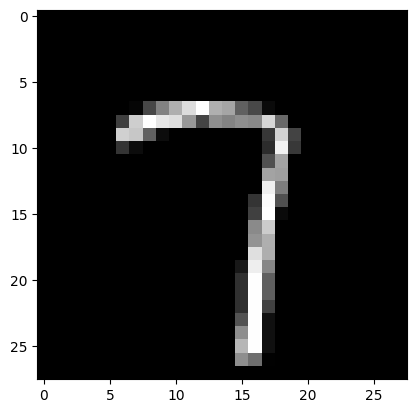

Sample image is on  cpu  device 
Moved it to  cuda:0
Predicted class: 7
Ground Truth / True class: 7
Predicted class using model.predict() :  tensor([7], device='cuda:0')


In [41]:
test_a_sample(model)

# Saving/Loading the model

Once you have trained the model, you can save the parameters in a place of your choice using the torch.save() method.

In [42]:
torch.save(model.state_dict(), 'model_weights.pth')

When you want to load the model and use it again, you need to create an untrained model and load the saved weights into it.

Image batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])

Sample Image : 


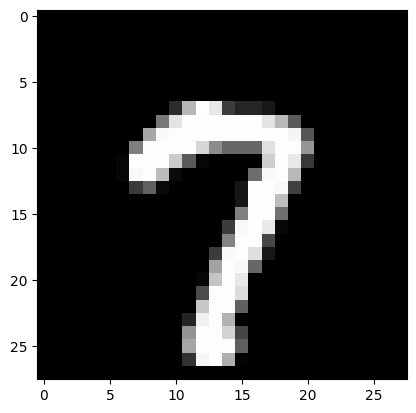

Sample image is on  cpu  device 
Moved it to  cuda:0
Predicted class: 7
Ground Truth / True class: 7
Predicted class using model.predict() :  tensor([7], device='cuda:0')


In [43]:
model_new = NeuralNetwork().to(DEVICE) # we do not specify ``weights``, i.e. create untrained model
# try testing a sample on "model_new" before you load the trained model in it

model_new.load_state_dict(torch.load('model_weights.pth'))
test_a_sample(model_new)

#Challenge - House Price Prediction Using Neural Network


In [44]:
#@title Set Device

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [45]:
#@title Imports
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torch import nn


## Challenge 1: Dataset and DataLoader

In [46]:
#@title Loading Data

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing_data = fetch_california_housing()
# print(housing_data)
print("Number of Features: ", len(housing_data.data[0]))
print("Number of Data Samples: ", len(housing_data.data))



Number of Features:  8
Number of Data Samples:  20640


In [47]:
#@title Complete Custom Dataset Class
# Refer: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

class CustomDataset(Dataset):
    def __init__(self, data_source):
        self.data_source =data_source
        self.features = torch.tensor(self.data_source.data, dtype=torch.float32)
        self.labels = torch.tensor(self.data_source.target, dtype=torch.float32)


    def __len__(self):
        return len(self.data_source.data)

    def __getitem__(self, idx):
        feature, label = ...  # Use idx (index) to reference each input row in the dataset
        return feature, label


In [48]:
#@title Specify the batch_size
batch_size = ...

In [49]:
#@title Declare Custom Dataset Class Object
custom_dataset = ...



In [51]:
# #@title Split the dataset into train and test
split_ratio =...
train_size = int(split_ratio * len(custom_dataset))
test_size = len(custom_dataset) - train_size

#Refer to torch.utils.data.random_split() in https://pytorch.org/docs/stable/data.html

housing_train_dataset, housing_test_dataset = ...

print(len(housing_train_dataset))
print(len(housing_test_dataset))


In [ ]:
#@title Intialize the data loader
train_housing_data_loader = ...
test_housing_data_loader = ...

In [ ]:
#@title Execute the below code to check Dataloader  - Try changing the batch_size!

for  id, batch_data in enumerate(train_housing_data_loader):

    batch_features, batch_labels = batch_data[0], batch_data[1]
    print("batch_features: ",  batch_features)
    print("batch_labels: ", batch_labels)

    break

## Challenge 2: Building Neural Network

In [ ]:
#@title Complete Code for NeuralNetwork class below
class HousingNueralNetwork(nn.Module): # Inherit from nn.Module
    def __init__(self):
        super().__init__()


        # Define a sequential container of layers in network
        #You are free to choose number of layers and number of neurons in each layer
        self.layer_stack = nn.Sequential(
            nn.Linear(8, ...), # number of neuron in first layer depend upon number of features
            ....
            nn.Linear(..., 1) # 1 neuron  in the output
        )

    def forward(self, x):

        output = ... # call layer_stack
        return output

#Create Object of HousingNueralNetwork class
housing_model = ...

#Send model to DEVICE
housing_model = ...

#print model
print(housing_model)



## Challenge 3 - Network Training

In [ ]:
#@title Specify Hyperparameter - learning rate and number of epochs
learning_rate = ... # Try different values like 0.01 , 0.002. etc
epochs = ...

In [ ]:
#@title Specify the loss function

housing_loss_fn = ...

In [ ]:
#@title Specify Optimizer
housing_optimizer =  ....

In [ ]:
#@title Complete code for Train loop

def housing_train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    loss = 0
    for batch, (X, y) in enumerate(dataloader):
        #Transfer X and y to DEVICE
        X=...
        y=...
        # Compute prediction and loss
        pred =...
        loss = ...


        # set gradients to zero
        ...

        # Backpropagation of loss
        ...

        #Update weights
        ...


        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)

            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return loss


In [ ]:
#@title Complete code for Test loop
def housing_test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with ...
        for X, y in dataloader:
            #Transfer X and y to DEVICE
            X=...
            y=...
            # Compute prediction and loss
            pred =...
            loss = ...
    print("Test loss (avg):",  test_loss)

    test_loss /= num_batches

    return test_loss

In [ ]:
#@title Optimization Process

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()


for epoch in ...: #loop should run "epochs" number  of times
    print(f"Epoch {epoch+1}\n-------------------------------")
    #call housing_train_loop and housing_test_loop
    train_loss = ...
    test_loss = ...

    writer.add_scalar("Housing_Loss/train", train_loss,epoch)
    writer.add_scalar("Housing_Loss/test", test_loss, epoch)




writer.flush()
writer.close()
print("Done!")

#Additional Material

### Tensorboard

This utility can be used to visualize the progress of the model throughout the training and testing phases.

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir runs

Resources used to make this tutorial: [Neuromatch Academy PyTorch Tutorial](https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html), [PyTorch - Learn The Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)